In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import pickle
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

data_dir = 'data/final_data/'

# On the binary data

In [2]:
data_r = pd.read_csv(data_dir + 'data_binary.csv')
# data_r = pd.read_csv('data/final_data/data.csv')
print(data_r.shape)

(36295, 442)


/Users/Kanetsugu/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# non-important information
data_cols = data_r.columns
cols1 = data_cols[0:20]
cols2 = data_cols[26:29]
cols3 = []
cols3 = data_cols[24:26]
data_cols_r = cols1.append(cols2).append(cols3)

print(data_cols_r)

Index(['SURVYEAR', 'NCESSCH', 'FIPST', 'LEAID', 'SCHNO', 'STID', 'SEASCH',
       'LEANM', 'SCHNAM', 'PHONE', 'MSTREE', 'MCITY', 'MSTATE', 'MZIP',
       'MZIP4', 'LSTREE', 'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'CONUM',
       'CONAME', 'CDCODE', 'LATCOD', 'LONCOD'],
      dtype='object')


In [4]:
data = data_r.drop(data_cols_r, axis=1)

In [6]:
data.shape

(36295, 417)

In [7]:
# param_grid = {'max_depth': np.arange(6, 30), 'criterion': ['gini', 'entropy'], 'max_features': np.arange(1,x.shape[1])}
# tree_g = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=10, scoring=scoring_methods, n_jobs=4, refit='f1')
# tree_g.fit(x, y)
# tree_g.best_params_

print(np.any(np.isnan(data['avg_teacher_salary'])))
print(np.all(np.isfinite(data['avg_teacher_salary'])))

False
True


In [8]:
data_nolabs = data.drop(['prof'], axis=1)

x = data_nolabs.as_matrix()
y = data['prof'].as_matrix()

var = data_nolabs.columns

In [9]:
print(x.shape)
print(y.shape)

x, y = shuffle(x, y, random_state=0)

scoring_methods = {'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'}
# scoring_methods = {'accuracy': 'accuracy', 'f1': 'f1_macro'}

(36295, 416)
(36295,)


In [27]:
# mnb = MultinomialNB()

# nb_scores = cross_validate(mnb, x, y, cv=10, scoring='accuracy')

# nb_scores

In [10]:
clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(x, y)
tree_scores = cross_validate(clf_tree, x,  y, cv=10, return_train_score=False, 
                             scoring=scoring_methods)
tree_scores

{'fit_time': array([ 6.22379589,  7.34247589,  5.96488404,  6.24290013,  9.0015831 ,
         5.77309799,  5.64375997,  5.73633814,  5.64749002,  5.56681609]),
 'score_time': array([ 0.02534199,  0.02015305,  0.01532412,  0.01669502,  0.01593804,
         0.02123499,  0.01553297,  0.01497293,  0.01659703,  0.01492882]),
 'test_accuracy': array([ 0.94352617,  0.94903581,  0.94325069,  0.94848485,  0.93856749,
         0.94407713,  0.94407713,  0.94929733,  0.94487321,  0.94459757]),
 'test_f1': array([ 0.94246422,  0.94819378,  0.94226457,  0.94818509,  0.9379694 ,
         0.9430575 ,  0.94315318,  0.94866071,  0.94438265,  0.94374475]),
 'test_roc_auc': array([ 0.94345094,  0.94899198,  0.94319438,  0.94858513,  0.93861276,
         0.94400959,  0.94403237,  0.94931055,  0.94493113,  0.94456805])}

In [14]:
print("Avg Accuracy:", np.mean(tree_scores['test_accuracy']))
print("Avg F-1 Score:", np.mean(tree_scores['test_f1']))
print("Avg AUC:", np.mean(tree_scores['test_roc_auc']))

Avg Accuracy: 0.944978739363
Avg F-1 Score: 0.944207586343
Avg AUC: 0.944968688485


In [12]:
tb = np.sort(clf_tree.feature_importances_)[::-1]
ta = np.argsort(clf_tree.feature_importances_)[::-1]

var[ta[tb>=.01]]

Index(['child_poverty', 'MAGNET', 'WHALF', 'SHARED', 'C38', 'C08', 'C04',
       'FRELCH', 'C10', 'ALL_RLA00NUMVALID_1314', 'C35', 'A07', 'LEVEL', 'C12',
       'CHARTR', 'C24', 'A13', 'ALL_MTH00NUMVALID_1314'],
      dtype='object')

In [13]:
clf_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
%%time

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(x, y)
rf_scores = cross_validate(clf_rf, x,  y, cv=10, return_train_score=False, 
                          scoring=scoring_methods)
rf_scores

Wall time: 3min 47s


In [15]:
print("Avg Accuracy:", np.mean(rf_scores['test_accuracy']))
print("Avg F-1 Score:", np.mean(rf_scores['test_f1']))
print("Avg AUC:", np.mean(rf_scores['test_roc_auc']))

Avg Accuracy: 0.970023569549
Avg F-1 Score: 0.969334385985
Avg AUC: 0.995089588079


In [16]:
rfb = np.sort(clf_rf.feature_importances_)[::-1]
rfa = np.argsort(clf_rf.feature_importances_)[::-1]

var[rfa]

Index(['child_poverty', 'MAGNET', 'C38', 'NSLPSTATUS', 'WHALF', 'C08', 'WHITE',
       'WHALM', 'FRELCH', 'C12',
       ...
       'G08OFFRD', 'KGOFFRD', 'G05OFFRD', 'G03OFFRD', 'G04OFFRD', 'G01OFFRD',
       'G02OFFRD', 'V85', 'BIES', 'WEIGHT'],
      dtype='object', length=416)

In [17]:
clf_rf # show parameters

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test set evaulation

In [18]:
rf_model = RandomForestClassifier(n_estimators=100)
# rf_model = RandomForestClassifier(criterion='entropy', max_features=.25, n_estimators=50, n_jobs=4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29036, 416)
(29036,)
(7259, 416)
(7259,)


In [19]:
%time rf_model.fit(x_train, y_train)

Wall time: 17.3 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred = rf_model.predict(x_test)
print("Accuracy on test:", accuracy_score(y_test, y_pred))
print("Precision on test:", precision_score(y_test, y_pred))
print("Recall on test:", recall_score(y_test, y_pred))
print("F-1 on test:", f1_score(y_test, y_pred))
print("AUC on test:", roc_auc_score(y_test, y_pred))

Accuracy on test: 0.968177434908
Precision on test: 0.975838544628
Recall on test: 0.959206482258
F-1 on test: 0.967451035649
AUC on test: 0.968054328085


In [21]:
# rf_model.estimators_

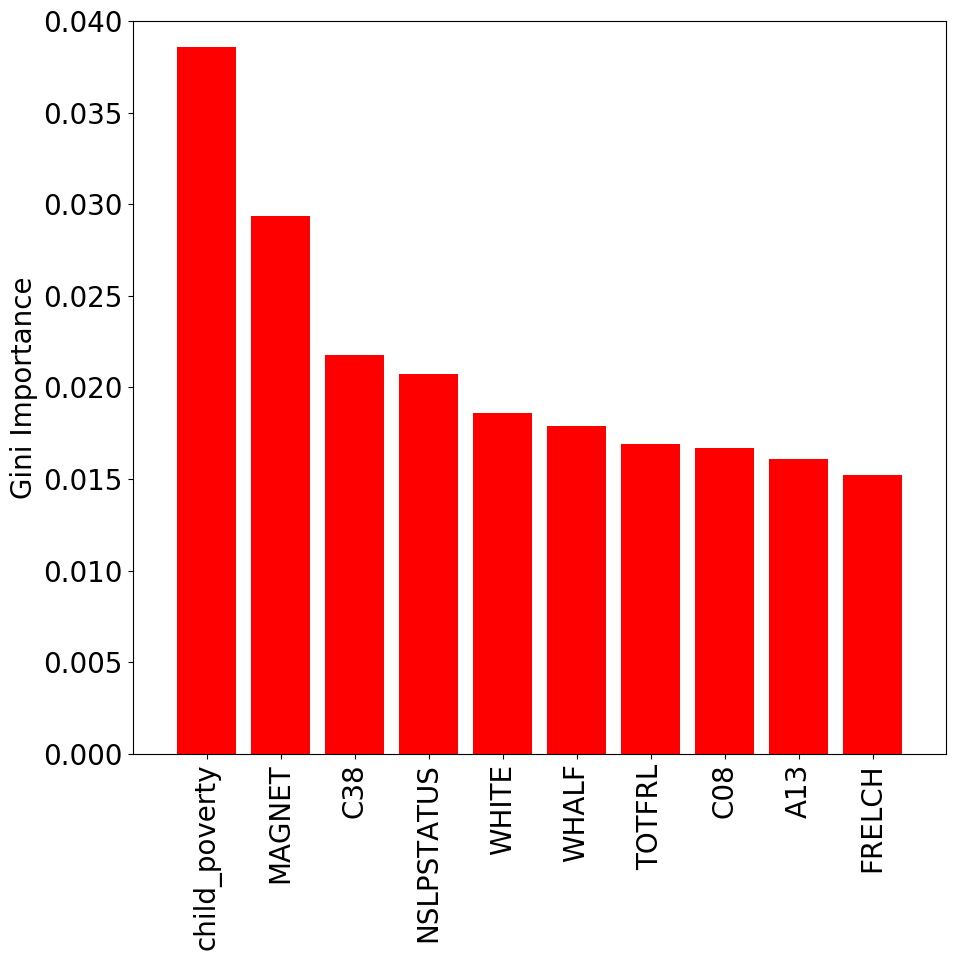

In [31]:
plt.rcParams.update({'font.size': 20})

forest = rf_model

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# for f in range(x.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

num_features = 10

plt.figure(figsize=(10,10), dpi=100)
# plt.title("Feature importances")
# plt.bar(range(num_features), importances[indices[:num_features]],
#        color="r", yerr=std[indices[:num_features]], align="center")
plt.bar(range(num_features), importances[indices[:num_features]],
       color="r", align="center")
plt.xticks(range(num_features), var[indices[:num_features]], rotation='vertical')
plt.xlim([-1,num_features])
plt.ylabel("Gini Importance")
plt.ylim([0,0.040])

plt.tight_layout()

plt.savefig("images/features_rf.eps", format="eps", dpi=1000)

plt.show()



# importances[indices[:num_features]]
# std[indices[:num_features]]

# range(x.shape[1])

In [23]:
rfb = np.sort(rf_model.feature_importances_)[::-1]
rfa = np.argsort(rf_model.feature_importances_)[::-1]
var[rfa[rfb>=.005]]

Index(['child_poverty', 'MAGNET', 'C38', 'NSLPSTATUS', 'WHITE', 'WHALF',
       'TOTFRL', 'C08', 'A13', 'FRELCH', 'WHALM', 'C12', 'ASIAN', 'C24', 'C39',
       'T15', 'C13', 'STITLI', 'Z38', 'SHARED', 'T09', 'ASALF', 'TITLEISTAT',
       'C05', 'T40', 'TNONELSE', 'TITLEI', 'C20', 'C06', 'V92', 'ASALM', 'C35',
       'T99', 'V16', 'avg_teacher_salary', 'C36', 'C04', 'U30', 'VIRTUALSTAT',
       'C10', 'C14', 'MEMBER', 'A07', 'U50', 'W31', 'T06', 'CHARTR',
       'ALL_RLA00NUMVALID_1314', 'C07', 'TFEDREV', 'REDLCH'],
      dtype='object')

In [24]:
rfb[rfb >= .005]

array([ 0.0385964 ,  0.02933045,  0.02175115,  0.02074319,  0.01860632,
        0.0178791 ,  0.01690539,  0.01667455,  0.01607825,  0.01519133,
        0.01394625,  0.01386123,  0.01243527,  0.01223592,  0.01134317,
        0.0112286 ,  0.01081664,  0.0103659 ,  0.01032034,  0.01020165,
        0.0095891 ,  0.00941952,  0.00938073,  0.00889585,  0.00870241,
        0.00868704,  0.00865496,  0.00806274,  0.00779754,  0.00740012,
        0.00718729,  0.00705712,  0.00681835,  0.00667808,  0.0066521 ,
        0.00644533,  0.00625457,  0.00620563,  0.00613816,  0.00605765,
        0.00587681,  0.00554307,  0.00547894,  0.00546918,  0.00525921,
        0.0051405 ,  0.00512409,  0.00508221,  0.00507366,  0.00503907,
        0.00502415])

In [25]:
np.min(rfb)

0.0

# Testing on networked data

# LOOCV on Vermont only

# LOOCV on Massachusetts

# LOOCV on States with < 70% majority no edge weights

# LOOCV on States with < 70% majority with edge weights

# Collective classification